In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
df = pd.read_csv('Modelling data.csv')
df

,Date,Engagements,Hour,Month,Year,Day,Quarter
0,2023-12-07 19:00:00,36,19,12,2023,3,4
1,2023-11-07 11:00:00,70,11,11,2023,1,4
2,2023-10-07 14:14:00,24,14,10,2023,5,4
3,2023-09-07 15:00:00,22,15,9,2023,3,3
4,2023-09-07 12:00:00,42,12,9,2023,3,3
...,...,...,...,...,...,...,...
8850,2018-01-31 15:30:00,14,15,1,2018,2,1
8851,2018-01-30 14:00:00,21,14,1,2018,1,1
8852,2018-01-30 10:00:00,25,10,1,2018,1,1
8853,2018-01-29 12:12:00,60,12,1,2018,0,1


In [15]:
df = df.drop(['Hour','Month','Year','Day','Quarter'],axis = 1)

In [16]:
df

,Date,Engagements
0,2023-12-07 19:00:00,36
1,2023-11-07 11:00:00,70
2,2023-10-07 14:14:00,24
3,2023-09-07 15:00:00,22
4,2023-09-07 12:00:00,42
...,...,...
8850,2018-01-31 15:30:00,14
8851,2018-01-30 14:00:00,21
8852,2018-01-30 10:00:00,25
8853,2018-01-29 12:12:00,60


In [17]:
df.dtypes

Date           object
Engagements     int64
dtype: object

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.dtypes

Date           datetime64[ns]
Engagements             int64
dtype: object

In [20]:
df.set_index('Date',inplace = True)

In [21]:
df

,Engagements
Date,
2023-12-07 19:00:00,36
2023-11-07 11:00:00,70
2023-10-07 14:14:00,24
2023-09-07 15:00:00,22
2023-09-07 12:00:00,42
...,...
2018-01-31 15:30:00,14
2018-01-30 14:00:00,21
2018-01-30 10:00:00,25


In [22]:
df.isna().sum()

Engagements    0
dtype: int64

In [24]:
df.describe()

,Engagements
count,8855.000000
mean,74.548165
std,281.970140
min,-23.000000
25%,14.000000
50%,27.000000
75%,58.500000
max,14972.000000


<Axes: xlabel='Date'>

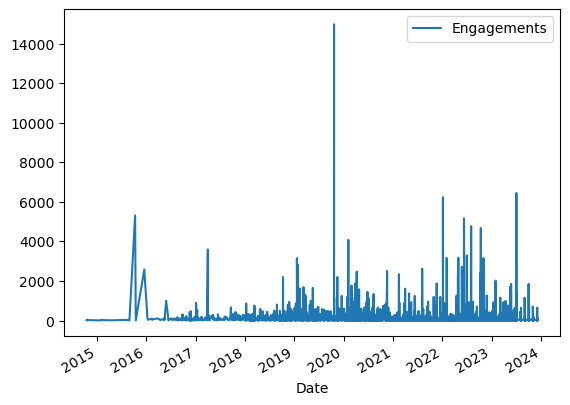

In [26]:
df.plot()

In [27]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller

In [28]:
test_results = adfuller(df['Engagements'])

In [32]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [33]:
adfuller(df['Engagements'])

(-10.432985602430131,
 1.5928404868922831e-18,
 32,
 8822,
 {'1%': -3.431091464947151,
  '5%': -2.8618676785820667,
  '10%': -2.566944418318808},
 124327.05646600907)

In [34]:
# p-value here is  1.5928404868922831e-18,relaltively zero. Data is stationary and null hypothesis will be rejected

In [35]:
# Differencing for auto correlation
df['Engs First Difference'] = df['Engagements'] - df['Engagements'].shift(1)

In [37]:
df['Engagements'].shift(1)

Date
2023-12-07 19:00:00     NaN
2023-11-07 11:00:00    36.0
2023-10-07 14:14:00    70.0
2023-09-07 15:00:00    24.0
2023-09-07 12:00:00    22.0
                       ... 
2018-01-31 15:30:00    18.0
2018-01-30 14:00:00    14.0
2018-01-30 10:00:00    21.0
2018-01-29 12:12:00    25.0
2018-01-29 10:00:00    60.0
Name: Engagements, Length: 8855, dtype: float64

In [38]:
df['Engs First Difference']=df['Engagements']-df['Engagements'].shift(12)

In [39]:
df

,Engagements,Engs First Difference
Date,,
2023-12-07 19:00:00,36,NaN
2023-11-07 11:00:00,70,NaN
2023-10-07 14:14:00,24,NaN
2023-09-07 15:00:00,22,NaN
2023-09-07 12:00:00,42,NaN
...,...,...
2018-01-31 15:30:00,14,0.0
2018-01-30 14:00:00,21,-1.0
2018-01-30 10:00:00,25,9.0


In [40]:
adfuller_test(df['Engs First Difference'].dropna())

ADF Test Statistic : -25.514690245105733
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 8807
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

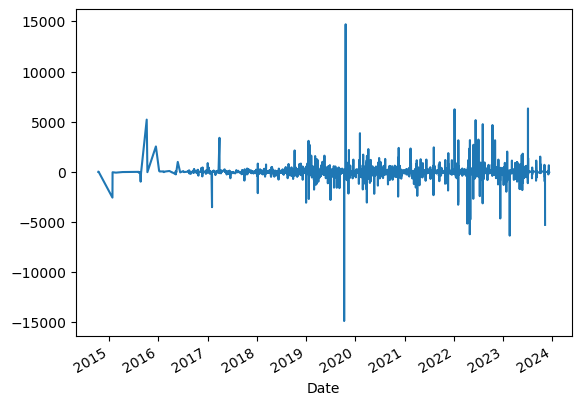

In [41]:
df['Engs First Difference'].plot()

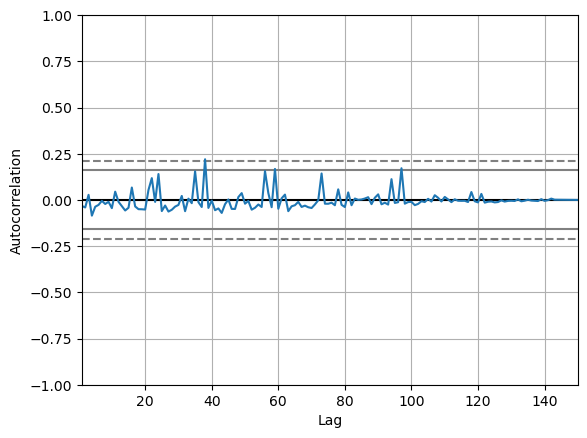

In [48]:
# autocorrelation plot for the first 150 rows
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Engagements'][:150])
plt.show()

In [55]:
model=sm.tsa.statespace.SARIMAX(df['Engagements'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\ADETUNJI ENIOLA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADETUNJI ENIOLA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADETUNJI ENIOLA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADETUNJI ENIOLA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, 

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Engagements   No. Observations:                 8855
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -62387.905
Date:                Sun, 08 Oct 2023   AIC                         124781.810
Time:                        16:46:11   BIC                         124803.076
Sample:                             0   HQIC                        124789.052
                               - 8855                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0107      0.008      1.285      0.199      -0.006       0.027
ma.L1         -0.9886      0.001   -788.041      0.000      -0.991      -0.986
sigma2      7.721e+04     61.622   1252.977      0.000    7.71e+04    7.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         385703423.54
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            24.79
Prob(H) (two-sided):                  0.00   Kurtosis:                      1024.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

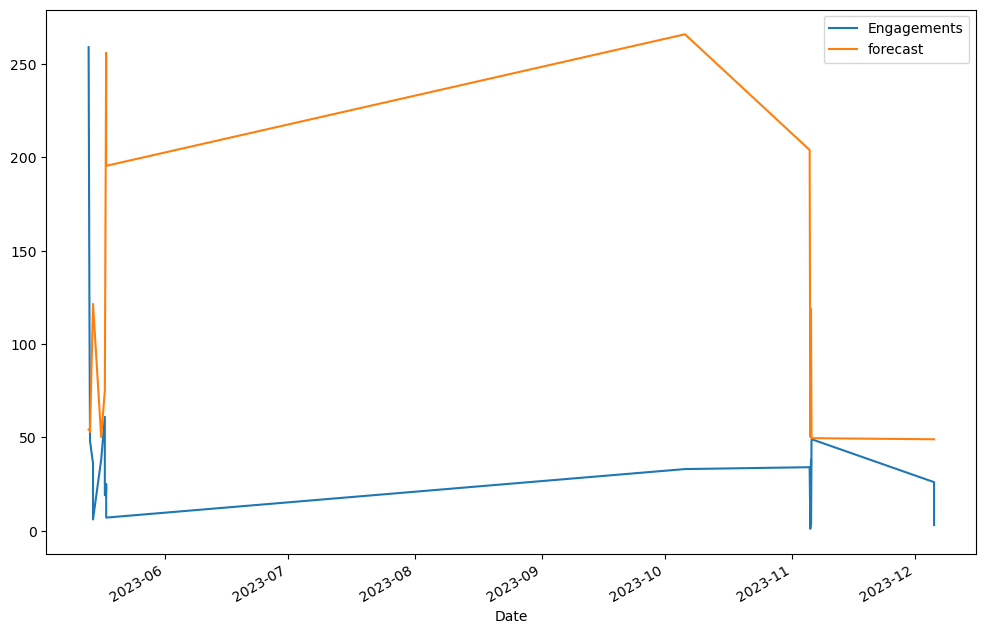

In [71]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Engagements','forecast']].plot(figsize=(12,8))

In [70]:
# The model predicts that Engagement would come up from June 2023 up to September and engagements will decline through December

In [72]:
df

,Engagements,Engs First Difference,forecast
Date,,,
2023-05-17 17:21:00,25,-17.0,195.430929
2023-05-17 17:06:00,21,-30.0,255.990244
2023-05-17 09:30:00,61,15.0,75.069168
2023-05-16 12:00:00,38,-60.0,50.180967
2023-05-14 12:15:00,36,-33.0,121.459583
2023-05-13 18:45:00,48,-33.0,52.874184
2023-05-13 15:30:00,111,67.0,53.787459
2023-05-13 10:30:00,259,201.0,54.215602
2023-12-05 16:30:00,26,-10.0,48.959397
